# Classificação

Adaptado de "Zero to mastery - Introdução ao Scikit-Learn": https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb
> O tutorial desse link é bastante completo se você quiser explorar mais o scikit-learn. 

Notas:
* Existem muitas soluções para os enunciados a seguir, implemente a sua :)
* O código fornecido é apenas uma referência, sinta-se livre pra mexer
* As instruções estão nas células textuais e devem ser implementadas na célula de código subsequente.
* Buscadores são seu melhor amigo! Na dúvida, procure "como fazer XYZ no scikit-learn".


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Funções úteis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

plt.style.use('ggplot')
np.random.seed(42)

## Carregamento de dados

A seguir, carregaremos a base de dados que possui atributos anônimos de cerca de 300 pacientes, cujo objetivo é uma classificação binária indicando a presença de um problema cardíaco naquele paciente (1: Sim, 0: Não).

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q1. Pré-processamento

* Separe os dados `(X, y)` em treino e teste `(Xtrain. Xtest, ytrain, ytest)`. Dica: `train_test_split` já importada nesse script.
* Normalize os dados. Lembre-se de ajustar os parâmetros de normalização **usando apenas os dados de treino**, mas normalize ambos os conjuntos. Dica: `StandardScaler` já importado no script.

In [3]:
# Porcentagem usada para treino
TRAIN_PERCENTAGE = 0.75

# Selecionando as dimensões de idade e batimentos máximos
X = heart_disease.drop("target", axis=1).to_numpy()
y = heart_disease["target"]

Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, train_size=TRAIN_PERCENTAGE, shuffle=True)

scaler = StandardScaler()

scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest  = scaler.transform(Xtest)

## Q2. Classificação com 2 atributos

Usando os atributos idade (age) e taxa máxima de batimentos cardíacos (thalach) iremos treinar a primeira leva de classificadores. Nessa etapa, defina empiricamente* hiperparâmetros que produzam classificadores interessantes. Note que este é um par de atributos com distribuições bastante misturadas, então algum nível de erro é esperado.

> *definições empíricas significam testar alguns hiperparâmetros seguindo sua intuição. A ideia é você fuçar métricas e visualizações para entender o comportamento de cada hiperparâmetro.

Você deve testar pelo menos os seguintes modelos e hiperparâmetros:
* [SVC Kernel Linear](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C`
* [SVC Kernel Polinomial](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C, grau, coef0`
* [SVC Kernel RBF](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C, gamma`
* [Árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `max_depth, min_impurity_decrease` 
* [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): `C`
* [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors, weights`

Na célula a seguir, iremos apenas separar os dados de treino em treino e validação para brincar com a definição de hiperparâmetros na célula seguinte.

(227, 2) (227,)


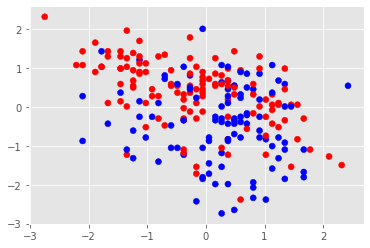

In [4]:
## TODO Selecione as dimensões de idade e batimentos máximos (só descomentar se Xtrain e ytrain já foram definidos)
X2d = Xtrain[:, [0, 7]]
y2d = ytrain

## TODO Visualize a distribuição (só descomentar)
plt.scatter(X2d[:, 0], X2d[:, 1], c=y2d, cmap='bwr')
print(X2d.shape, y2d.shape)

## TODO Separar os dados (X2d, y2d) em treino e validação (X2d_train, X2d_val, y2d_train, y2d_val)
X2d_train, X2d_val, y2d_train, y2d_val = train_test_split(X2d, y2d, train_size=TRAIN_PERCENTAGE, shuffle=True)

* Deixe na célula a seguir os 6 classificadores solicitados no enunciado com os hiperparâmetros que você definiu empiricamente.
* Plot a visualização da fronteira de decisão de cada um de seus classificadores.
* No título de cada plot inclua: 1) O classificador, 2) acurácia de treino e 3) acurácia de validação.

A célula abaixo já traz a função `plot_boundary(X, y, clf)` que recebe dados, rótulos e um estimador, e apresenta uma visualização da fronteira de decisão. Complete a célula como identificado abaixo.

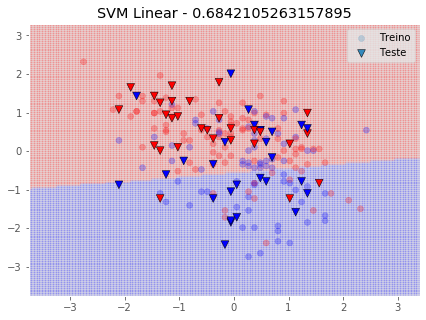

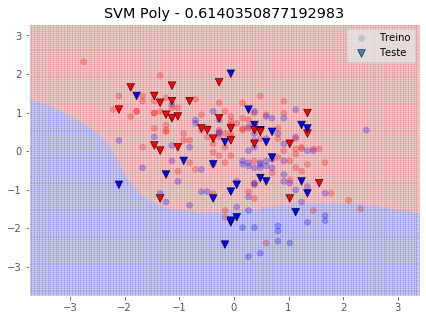

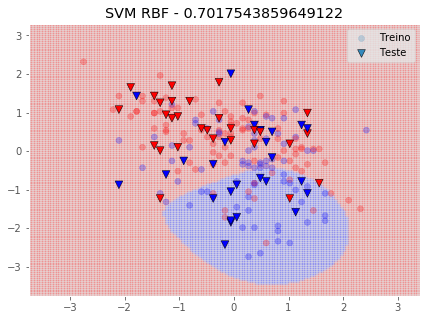

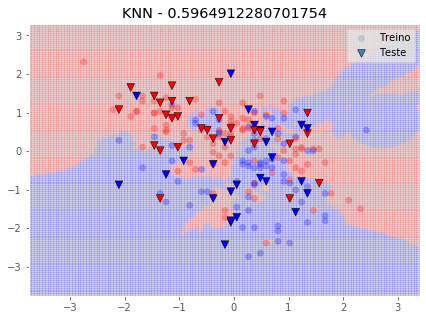

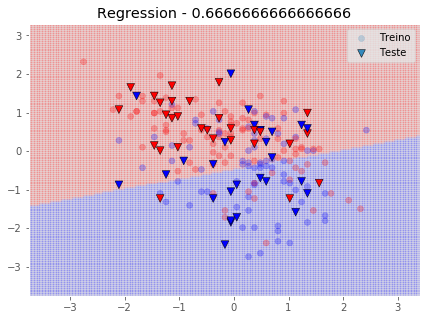

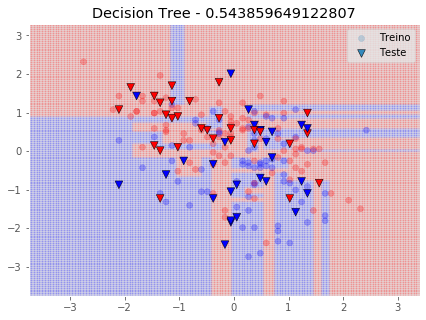

In [12]:
def plot_boundary(Xtr, Xts, ytr, yts, clf, clf_name='SVM'):
  
  x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
  y_min, y_max = Xtr[:, 0].min() - 1, Xtr[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  fig, ax = plt.subplots(1, 1, figsize=(7, 5))
  ax.pcolormesh(xx, yy, Z, alpha=0.1, cmap='bwr')
  ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, alpha=0.25, cmap='bwr', label='Treino')
  ax.scatter(Xts[:, 0], Xts[:, 1], c=yts, marker='v', edgecolors='k', s=60, cmap='bwr', label='Teste')
  
  ## TODO organize o título da figura com o score do estimador clf (parâmetro)
  my_score = clf.score(Xts, yts)
  plt.title(f"{clf_name} - {my_score}")
  
  plt.legend()
  plt.show()

## TODO defina os classificadores e plot as fronteiras
## Exemplo:
## clf = svm.SVC(kernel='linear', C=0.1)
## clf.fit(X2d_train, y2d_train)
## plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM Linear')


clf_svmlinear = svm.SVC(kernel='linear', C=0.1)
clf_svmlinear.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmlinear, 'SVM Linear')


clf_svmpoly = svm.SVC(kernel='poly', C=0.1, coef0=0.0)
clf_svmpoly.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmpoly, 'SVM Poly')


clf_svmrbf = svm.SVC(kernel="rbf", C=0.1, gamma='scale')
clf_svmrbf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmrbf, 'SVM RBF')


clf_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf_knn.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_knn, 'KNN')


clf_regression = LogisticRegression(penalty='l2', C=0.1)
clf_regression.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_regression, 'Regression')


clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_impurity_decrease=0.0)
clf_tree.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_tree, 'Decision Tree')


## Q3. Otimização de hiperparâmetros

Agora a brincadeira fica séria. Vamos definir um classificador usando todos os atributos da base. Agora que você já entende melhor os classificadores e os efeitos de cada hiperparâmetro, defina uma busca ([em grid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) ou [aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)) para otimizar os hiperparâmetros de **dois classificadores de sua escolha**.

> Sugestão: escolha dois classificadores bem distintos entre si para comparar os resultados. 

Passo a passo:
* Realize a otimização de hiperparâmetros utilizando **apenas os dados de treino**.
* Selecione a melhor configuração para cada classificador que você escolheu
* Reporte os resultados dos seus classificadores no conjunto de teste (que não mexemos até agora ;). Dica: `classification_report` e `confusion_matrix` já importados.


Best KNN score in training = 0.7117647058823531
Best KNN params = {'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Score in testing set = 0.631578947368421


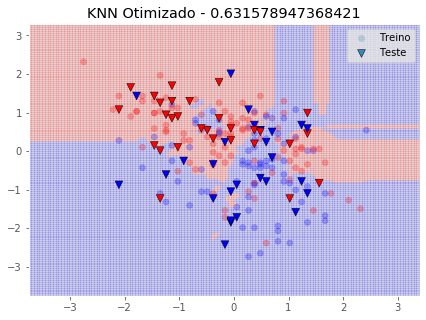

Best SVM score in training = 0.7000000000000001
Best SVM params = {'C': 1.4000000000000001, 'coef0': 0.7000000000000001, 'degree': 4, 'kernel': 'poly'}
Score in testing set = 0.7017543859649122


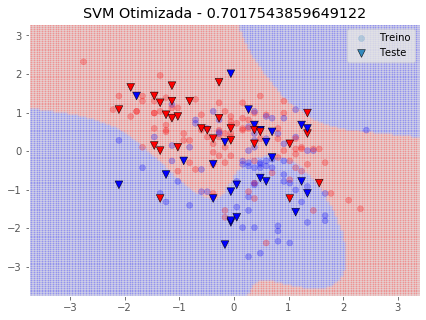

In [13]:
## TODO busque os melhores hiperparâmetros

###########
##
##  KNN
##
###########

parameters_knn = {
    'n_neighbors':np.arange(3, 21, 1, dtype=np.int32),
    'leaf_size': np.arange(20, 60, 5, dtype=np.int32),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'],
    'p': [1, 2]
    }

knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, parameters_knn)
clf_knn.fit(X2d_train, y2d_train)

print(f"Best KNN score in training = {clf_knn.best_score_}")
print(f"Best KNN params = {clf_knn.best_params_}")

clf_knn = clf_knn.best_estimator_

print(f"Score in testing set = {clf_knn.score(X2d_val, y2d_val)}")
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_knn, 'KNN Otimizado')


####################
##
##  SVM
##
####################

parameters_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.arange(0.1, 4, 0.1),
    'degree': [1, 2, 3, 4],
    'coef0': np.arange(0.0, 1.5, 0.1)
    }

classifier = svm.SVC()
clf_svm = GridSearchCV(classifier, parameters_svm)
clf_svm.fit(X2d_train, y2d_train)

print(f"Best SVM score in training = {clf_svm.best_score_}")
print(f"Best SVM params = {clf_svm.best_params_}")

print(f"Score in testing set = {clf_svm.score(X2d_val, y2d_val)}")
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svm, 'SVM Otimizada')

KNN:               precision    recall  f1-score   support

           0       0.61      0.63      0.62        27
           1       0.66      0.63      0.64        30

    accuracy                           0.63        57
   macro avg       0.63      0.63      0.63        57
weighted avg       0.63      0.63      0.63        57



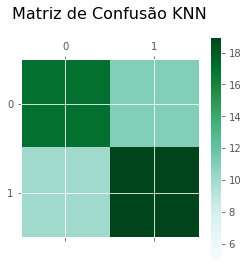

SVM:               precision    recall  f1-score   support

           0       0.50      0.82      0.62        17
           1       0.90      0.65      0.75        40

    accuracy                           0.70        57
   macro avg       0.70      0.74      0.69        57
weighted avg       0.78      0.70      0.71        57



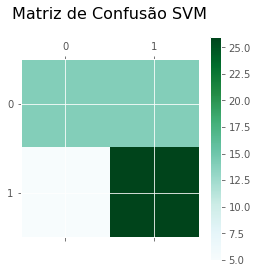

In [14]:
## TODO Retreine os modelos com os melhores hiperparâmetros
## TODO Reporte o desempenho de cada classificador

report_knn = classification_report(clf_knn.predict(X2d_val), y2d_val)
report_svm = classification_report(clf_svm.predict(X2d_val), y2d_val)

c_matrix_knn = confusion_matrix(y2d_val, clf_knn.predict(X2d_val))
c_matrix_svm = confusion_matrix(y2d_val, clf_svm.predict(X2d_val))

## KNN Metrics
print(f"KNN: {report_knn}")

knn_plot = plt

knn_plot.matshow(c_matrix_knn, cmap=plt.cm.BuGn, vmin=5)
knn_plot.title("Matriz de Confusão KNN", y=1, loc="center", pad=40, fontsize=16)
knn_plot.colorbar()

knn_plot.show()

## SVM Metrics
print(f"SVM: {report_svm}")

svm_plot = plt

svm_plot.matshow(c_matrix_svm, cmap=plt.cm.BuGn, vmin=5)
svm_plot.title("Matriz de Confusão SVM", y=1, loc="center", pad=40, fontsize=16)
svm_plot.colorbar()

svm_plot.show()

## Dica extra: Salvando e carregando modelos

A biblioteca pickle permite salvar e carregar arquivos binários contendo objetos do python. A célula a seguir apresenta um exemplo dessas funções. 

In [ ]:
import pickle

## Save an existing model to file
pickle.dump(clf_knn, open("knn_classifier.pkl", "wb"))

## Load a saved model and make a prediction
loaded_model = pickle.load(open("knn_classifier.pkl", "rb"))
loaded_model.score(X2d_val, y2d_val)